<a href="https://colab.research.google.com/github/ishardina/Website_Analysis/blob/main/E_commerce_Website_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **E-Commerce Website Analysis**

In this digital era, one of the things that company CEOs need to pay attention to is the performance of their websites. In this notebook, I'm trying to solve the problem of a company CEO who is not very happy with sales volume, especially sales coming from new users. Therefore, he asked me to investigate if there was something wrong with the **conversion funnel** or in general whether I could suggest how the conversion rate could be improved.

**Author : Ishardina Cholifatul Hidayati**

## **Table of Content**

1. Website Overview
2. Pre-processing Data
3. Exploratory Data Analysis
4. Conclusion
5. Suggestion

## **1. Website Overview**

This site is very simple and only has 4 pages:

1. The first page is the **home page**. When the user opens the site for the first time, the user can only open the home page as the first page.
2. From the home page, users can perform searches and land on the **search page**.
3. From the search page, if the user clicks on a product, the user will arrive at the **payment page**, where the user is asked to provide payment information to purchase the product.
4. If the user decides to buy, the user ends up on the **confirmation page**.


## **2. Pre Processing Data**

In this step, we will check the data size and manipulate the dataframe so that the data is ready to use.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#import data
user_df = pd.read_csv('/content/user_table.csv')
page1 = pd.read_csv('/content/home_page_table.csv')
page2 = pd.read_csv('/content/search_page_table.csv')
page3 = pd.read_csv('/content/payment_page_table.csv')
page4 = pd.read_csv('/content/payment_confirmation_table.csv')

In [3]:
user_df.head()

,user_id,date,device,sex
0,450007,2015-02-28,Desktop,Female
1,756838,2015-01-13,Desktop,Male
2,568983,2015-04-09,Desktop,Male
3,190794,2015-02-18,Desktop,Female
4,537909,2015-01-15,Desktop,Male


In [4]:
page1.head()

,user_id,page
0,313593,home_page
1,468315,home_page
2,264005,home_page
3,290784,home_page
4,639104,home_page


In [5]:
page2.head()

,user_id,page
0,15866,search_page
1,347058,search_page
2,577020,search_page
3,780347,search_page
4,383739,search_page


In [6]:
page3.head()

,user_id,page
0,253019,payment_page
1,310478,payment_page
2,304081,payment_page
3,901286,payment_page
4,195052,payment_page


In [7]:
page4.head()

,user_id,page
0,123100,payment_confirmation_page
1,704999,payment_confirmation_page
2,407188,payment_confirmation_page
3,538348,payment_confirmation_page
4,841681,payment_confirmation_page


In [8]:
#knowing the number of every visitor page
print('all users : ', user_df.shape[0])
print('home page visitor :', page1.shape[0])
print('search page visitor : ', page2.shape[0])
print('payment page visitor :', page3.shape[0])
print('payment confirmation page visitor : ', page4.shape[0])

all users :  90400
home page visitor : 90400
search page visitor :  45200
payment page visitor : 6030
payment confirmation page visitor :  452


In [9]:
#merge the dataframe to simplify
df = user_df.merge(page1,
              how='left',
              left_on='user_id',
              right_on='user_id')
df = df.merge(page2,
              how='left',
              left_on='user_id',
              right_on='user_id')
df.head()

,user_id,date,device,sex,page_x,page_y
0,450007,2015-02-28,Desktop,Female,home_page,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page
3,190794,2015-02-18,Desktop,Female,home_page,search_page
4,537909,2015-01-15,Desktop,Male,home_page,NaN


In [10]:
df.rename(columns={'page_x':'home_page', 'page_y' : 'search_page'}, inplace=True)
df = df.merge(page3,
              how='left',
              left_on='user_id',
              right_on='user_id')
df = df.merge(page4,
              how='left',
              left_on='user_id',
              right_on='user_id')
df.head()

,user_id,date,device,sex,home_page,search_page,page_x,page_y
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN


In [11]:
df.rename(columns={'page_x':'payment_page', 'page_y' : 'payment_confirmation_page'}, inplace=True)

In [12]:
df.head()

,user_id,date,device,sex,home_page,search_page,payment_page,payment_confirmation_page
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN


In [13]:
#change the page information data to numeric

df = df.replace({'home_page':'home_page', 'search_page': 'search_page', 'payment_page': 'payment_page', 'payment_confirmation_page': 'payment_confirmation_page'}, 1)
df = df.fillna(0)
df.head()

,user_id,date,device,sex,home_page,search_page,payment_page,payment_confirmation_page
0,450007,2015-02-28,Desktop,Female,1,0.0,0.0,0.0
1,756838,2015-01-13,Desktop,Male,1,0.0,0.0,0.0
2,568983,2015-04-09,Desktop,Male,1,1.0,0.0,0.0
3,190794,2015-02-18,Desktop,Female,1,1.0,0.0,0.0
4,537909,2015-01-15,Desktop,Male,1,0.0,0.0,0.0


## **3. Exploratory Data Analys**

At this stage, we will try to answer some questions to get insights from the data we already have.

### **What does the sales funnel look like?**
We identified the processes a visitor goes through until the purchase is done. By doing this, I used Python package plotly to do the visualizations.

In [14]:
#draw funnel chart using plotly package
from plotly import graph_objects as go

fig = go.Figure(go.Funnel(
    y = ["home_page", "search_page", "payment_page", "payment_confirmation_page"],
    x = [page1.shape[0], page2.shape[0], page3.shape[0], page4.shape[0]],
    textposition = "outside",
    textinfo = "value+percent initial"))

fig.show()

Some of the things that I can conclude from the chat above are as follows:
1. As many as 50% of visitors leave the website before they even conduct a product search.
2. Only about 7% of all visitors reached the checkout page (losing about 86.7% of visitors from search pages).
3. Only about 1% of all visitors who decided to buy the product (lost 92.5% of visitors from the payment page).



### **What factors are causing the low conversion rate and big bounce percentage?**

To dig into the reasons, we will try to do segmentation analysis to segment the data and see which section performs the worst concerning conversion rate.

### **Segmentation Analysis**

Based on what we have in our data set, I will do the following:
*   Segmentation based on gender
*   Segmentation based on device



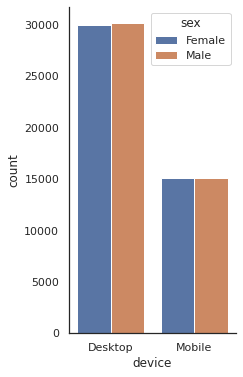

In [15]:
plt.figure(figsize=(3,6))
sns.set(style='white')
ax = sns.countplot(x='device', hue='sex',data=df)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.grid(False)

From the graph, it can be seen that the differences between men and women are almost the same for each device. However, it is clear that twice as many visitors as mobile use a desktop.

In [16]:
df_count = df.groupby(['sex'])["home_page", "search_page", "payment_page", "payment_confirmation_page"].sum()
df_count

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,home_page,search_page,payment_page,payment_confirmation_page
sex,,,,
Female,45075,22676.0,3100.0,241.0
Male,45325,22524.0,2930.0,211.0


In [17]:
fig = go.Figure()

fig.add_trace(go.Funnel(
    name = 'Female',
    y = ["home_page", "search_page", "payment_page", "payment_confirmation_page"],
    x = df_count.loc['Female'],
    textposition = "inside",
    textinfo = "value+percent initial"))

fig.add_trace(go.Funnel(
    name = 'Male',
    orientation = "h",
    y = ["home_page", "search_page", "payment_page", "payment_confirmation_page"],
    x = df_count.loc['Male'],
    textposition = "outside",
    textinfo = "value+percent initial"))

fig.show()


The segmentation analysis based on gender did not show any differences between the two. So, we need to do another analysis to find out the cause of the bounce percentage.

In [18]:
df_count_2 = df.groupby(['device'])["home_page", "search_page", "payment_page", "payment_confirmation_page"].sum()
df_count_2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,home_page,search_page,payment_page,payment_confirmation_page
device,,,,
Desktop,60200,30100.0,3010.0,150.0
Mobile,30200,15100.0,3020.0,302.0


In [19]:
fig = go.Figure()

fig.add_trace(go.Funnel(
    name = 'Desktop',
    y = ["home_page", "search_page", "payment_page", "payment_confirmation_page"],
    x = df_count_2.loc['Desktop'],
    textposition = "inside",
    textinfo = "value+percent initial"))

fig.add_trace(go.Funnel(
    name = 'Mobile',
    orientation = "h",
    y = ["home_page", "search_page", "payment_page", "payment_confirmation_page"],
    x = df_count_2.loc['Mobile'],
    textposition = "outside",
    textinfo = "value+percent initial"))

fig.show()

If you look at the chart, between desktop users and mobile users there is no difference on the search page, both of them lost 50% of visitors before they even had time to search for products. As for the payment page, we lost twice as much for desktop users as for mobile users. In fact, nearly 0% of visitors complete a purchase for desktop users.

Until now, we have gained insights about the performance of the desktop version of the website, which generates a greater bounce percentage (low conversion rate) than the mobile version. But, we need to dig the data deeper to know the specific reason. So, we will look at the website visitors over time.



### **How does the number of visitors of the website changed over time?**

Next, we will do trend analysis to find out how the number of visitors changes over time.

### **Trend Analysis**

Based on what we have in our data set, I will do the following:

*   Visitors of the website over time
*   Conversion rate of every website page over time 
*   Conversion rate by gender over time
*   Conversion rate by device over time



In [20]:
import plotly.express as px

df_group = df.groupby(['date'], as_index= False)["home_page", "search_page", "payment_page", "payment_confirmation_page"].sum()
df_group.rename(columns={'home_page':'Number_of_visitors'}, inplace=True)
fig = px.line(df_group, x='date', y="Number_of_visitors")
fig.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



From the Time series plot above we can see that, there is a rise of visitors on **Feb 1** and a obvious drop on **Mar 1**. 

In [21]:
import plotly.express as px

def percentage(variable):
  return variable*100/df_group['home_page']

df_group.rename(columns={'Number_of_visitors':'home_page'}, inplace=True)
#calculate conversion rate for every page
df_group[["search_page %", 'payment_page %', 'confirmation_payment_page %']] = df_group[["search_page", "payment_page", "payment_confirmation_page"]].apply(percentage) 
df_conversion_rate = df_group.drop(columns=["home_page", "search_page", "payment_page", "payment_confirmation_page"])
#reshape the dataframe using melt function to able applied in the chart
df_melt= df_conversion_rate.melt(id_vars=["date"])

#draw interactive time series chart
fig = px.line(df_melt, x='date', y='value',
              color="variable",
              line_group="variable", hover_name="variable")
fig.update_xaxes(
    dtick="M1",
    tickformat="%b %d\n%Y")
fig.show()

In the graph above, there is a significant reduction in the conversion rate on March 1 for both the search page and the payment page. Meanwhile, Feb 1 does not show an increase in conversion rate even though the previous graph shows an increase in visitors on that date. The payment confirmation page tends not to experience significant changes but has also decreased since March 1.

In [22]:
#calculate the visitors by time for every page
gender = df.groupby(['date', 'sex']).agg({'search_page': 'sum', 'payment_page': 'sum', 'payment_confirmation_page': 'sum'})
#manipulate the dataframe to be able to calculate the conversion rate
gender.columns = ['search_page', 'payment_page', 'payment_confirmation_page']
gender = pd.DataFrame(gender.reset_index())
gender = gender.melt(id_vars=["date", "sex"]) 
gender['variable'] = gender['sex'] +'_'+ gender['variable']
gender.drop(columns='sex', inplace=True)
gender= gender.pivot( index='date', columns="variable", values="value")

#calculate the visitors by time for every gender
gender2 = pd.get_dummies(df[['date', 'sex']], columns=['sex'], drop_first=False)
gender2 = gender2.groupby('date', as_index= False)['sex_Female', 'sex_Male'].sum()

#merge two tables
gender3 = gender.merge(gender2,
              how='left',
              left_index=True,
              right_on='date')

gender3.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Female_payment_confirmation_page,Female_payment_page,Female_search_page,Male_payment_confirmation_page,Male_payment_page,Male_search_page,date,sex_Female,sex_Male
0,3.0,45.0,220.0,3.0,31.0,216.0,2015-01-01,351.0,361.0
1,2.0,41.0,229.0,3.0,43.0,218.0,2015-01-02,355.0,366.0
2,3.0,26.0,200.0,4.0,38.0,222.0,2015-01-03,375.0,385.0
3,2.0,40.0,227.0,5.0,36.0,220.0,2015-01-04,361.0,352.0
4,6.0,44.0,222.0,5.0,44.0,240.0,2015-01-05,360.0,394.0


In [23]:
#define the function for calculate conversion rate
def cvr_rate_m (variable):
  return variable*100/gender3['sex_Male']

def cvr_rate_f (variable):
  return variable*100/gender3['sex_Female']

#calculate conversion rate by page and by gender
gender3[["Female_search_page %", 'Female_payment_page %', 'Female_payment_confirmation_page %']] = gender3[["Female_search_page", 'Female_payment_page', 'Female_payment_confirmation_page']].apply(cvr_rate_f) 
gender3[["Male_search_page %", 'Male_payment_page %', 'Male_payment_confirmation_page %']] = gender3[["Male_search_page", 'Male_payment_page', 'Male_payment_confirmation_page']].apply(cvr_rate_m) 
#drop a few columns that useless
gender3 = gender3.drop(columns=["Female_search_page", 'Female_payment_page', 'Female_payment_confirmation_page', "Male_search_page", 'Male_payment_page', 'Male_payment_confirmation_page', 'sex_Male', 'sex_Female'])
#reshape the dataframe using melt function to be able apllied to the graph
gender_melt= gender3.melt(id_vars=["date"])  

#plot the data 
fig = px.line(gender_melt, x='date', y='value',
              color="variable",
              line_group="variable", hover_name="variable")
fig.update_xaxes(
    dtick="M1",
    tickformat="%b %d\n%Y")
fig.show()


The graph shows how conversion rates changed over time in each group. We break the whole group into one area for easy comparison. Let's look at the chart above, we can see that, there is no big difference between the trend of the conversion ratio of the Boys and Girls groups, everything is changing in the same direction. Now we can say that gender may not be the factor driving the conversion rate down.

In [24]:
#this step is identical to the step before
device = df.groupby(['date', 'device']).agg({'search_page': 'sum', 'payment_page': 'sum', 'payment_confirmation_page': 'sum'})
device.columns = ['search_page', 'payment_page', 'payment_confirmation_page']
device = pd.DataFrame(device.reset_index())
device = device.melt(id_vars=["date", "device"]) 
device['variable'] = device['device'] +'_'+ device['variable']
device.drop(columns='device', inplace=True)
device= device.pivot( index='date', columns="variable", values="value")

device2 = pd.get_dummies(df[['date', 'device']], columns=['device'], drop_first=False)
device2 = device2.groupby('date', as_index= False)['device_Desktop', 'device_Mobile'].sum()

device3 = device.merge(device2,
              how='left',
              left_index=True,
              right_on='date')

device3.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Desktop_payment_confirmation_page,Desktop_payment_page,Desktop_search_page,Mobile_payment_confirmation_page,Mobile_payment_page,Mobile_search_page,date,device_Desktop,device_Mobile
0,1.0,47.0,256.0,5.0,29.0,180.0,2015-01-01,493.0,219.0
1,1.0,44.0,261.0,4.0,40.0,186.0,2015-01-02,484.0,237.0
2,3.0,22.0,222.0,4.0,42.0,200.0,2015-01-03,507.0,253.0
3,1.0,38.0,249.0,6.0,38.0,198.0,2015-01-04,474.0,239.0
4,3.0,37.0,249.0,8.0,51.0,213.0,2015-01-05,483.0,271.0


In [25]:
def cvr_rate_d (variable):
  return variable*100/device3['device_Desktop']

def cvr_rate_mo (variable):
  return variable*100/device3['device_Mobile']

device3[["Desktop_search_page %", 'Desktop_payment_page %', 'Desktop_payment_confirmation_page %']] = device3[["Desktop_search_page", 'Desktop_payment_page', 'Desktop_payment_confirmation_page']].apply(cvr_rate_d) 
device3[["Mobile_search_page %", 'Mobile_payment_page %', 'Mobile_payment_confirmation_page %']] = device3[["Mobile_search_page", 'Mobile_payment_page', 'Mobile_payment_confirmation_page']].apply(cvr_rate_mo) 
device3 = device3.drop(columns=["Desktop_search_page", 'Desktop_payment_page', 'Desktop_payment_confirmation_page', "Mobile_search_page", 'Mobile_payment_page', 'Mobile_payment_confirmation_page', 'device_Mobile', 'device_Desktop'])
device_melt= device3.melt(id_vars=["date"])  


fig = px.line(device_melt, x='date', y='value',
              color="variable",
              line_group="variable", hover_name="variable")
fig.update_xaxes(
    dtick="M1",
    tickformat="%b %d\n%Y")
fig.show()

When looking at the graphic above, we will immediately notice that the mobile conversion rate is always higher than desktop. In fact, the mobile conversion rate on the search page had reached 80%. However, on March 1, there was a very significant decrease (up to 60%), so after that date, the mobile conversion rate on the search page was only around 20%. This of course resulted in a decrease in the conversion rate on the payment page and payment confirmation page. While the desktop conversion rate looked stable for the search page and payment confirmation page, however, it decreased slightly for the payment page on March 1.

## **4. Conclusion**

Based on the analysis we have done before, we can conclude:
1. Overall, website performance doesn't look healthy. In fact, 50% of website visitors choose to leave the website while still on the home page.
2. The comparison of male and female visitors is almost the same for each device. However, visitors who use desktops are twice as high as visitors who use mobile.
3. The performance of the desktop version of the website results in a smaller conversion rate than the mobile version (and the mobile version of the website always provides a higher conversion rate).
4. There was an additional visitor on Feb 1, but it did not increase the conversion rate on that date.
5. On March 1, there was a very significant decrease (up to 60%) for the mobile conversion rate on the search page.
6. The payment page and payment confirmation page has a low conversion rate.



## **5. Suggestion**
We already know the problems that occur on this company's website based on the analysis we have done. So, here is input for the CEO to optimize the performance of his website.

1. If you want to get new visitors, then we can observe several trends on the chart to find out when the visitors went up, such as February 1. After that, we look back, what really caused the increase? Could it be that we held a promotion at that time? or Launching a new product? So, we can go back to trying this strategy to increase visitors.
2. Fix / Change website for desktop because twice as many visitors use desktop but have a lower conversion rate. So, it shows that there are things on the desktop version of the website that can be optimized again. For example, visitors leave the website since they are on the home page due to an unattractive appearance, irrelevant product search results on the search page, lack of types of methods for making payments on the payment page, etc.
3. To intensify the publication of the mobile version of the website to get more users. This needs to be done because a better mobile version of the website conversion rate will increase the chances of a user to decide to buy a product. However, it is necessary to conduct an investigation as well as resolve the problem regarding the cause of the drop in the mobile conversion rate on the search page that occurred on March 1. Could there be a change in the appearance of the website that users don't like?
4. Re-discuss matters relating to the payment page and payment confirmation page because both pages have a low conversion rate. Maybe because the product price is beyond expectations? or a voucher code that can't be used?

